## Build a Neural Network model for 50_startups data to predict profit 
#dataset:50_Startups.csv

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
from tensorflow import keras

In [2]:
# Importing necessary models for implementation of ANN
from keras.models import Sequential
from keras.layers import Dense # Activation,Layer,Lambda

Using TensorFlow backend.


In [3]:
# Reading the dataset using pandas function
df_before = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\neural\\50_Startups.csv")

In [4]:
# Showing five top records
df_before.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Showing the shape of dataframe i.e. rows x cols
df_before.shape

(50, 5)

In [6]:
# Showing the statistiscal calculation of dataset
df_before.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Checking the null values in data
df_before.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
# Showing general info about dataset as Columns, Counts & Dtypes
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
# Shwoing unique values of target cols.
df_before.State.unique() 

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
# Importing the ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

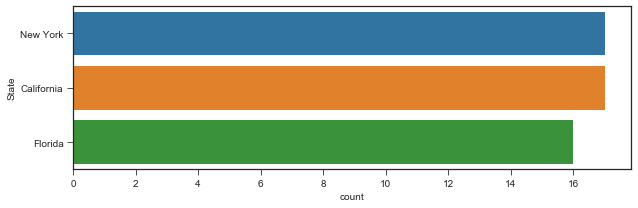

In [11]:
#Seaborn visualization of countplot 
fig = plt.figure(figsize=(10,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="State", data=df_before)

In [12]:
df_before.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [13]:
# Creating dummies var for columns month,day,size_category with dropping first columns
df_after=pd.get_dummies(df_before,columns={'State'},drop_first=True)
df_after.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [14]:
# Using Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_after.iloc[:,:])
df_norm.tail()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
45,0.006049,0.554724,0.004036,0.282940,0.0,1.0
46,0.007956,0.491260,0.629768,0.196020,1.0,0.0
47,0.000000,0.640547,0.000000,0.156990,0.0,0.0
48,0.003278,0.003502,0.000000,0.118211,0.0,1.0
49,0.000000,0.500148,0.095749,0.000000,0.0,0.0


In [16]:
# Forming the predictors i.e independent variables
predictors=df_norm.drop(['Profit'],axis=1)
predictors.head()


,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,1.000000,0.651744,1.000000,0.0,1.0
1,0.983359,0.761972,0.940893,0.0,0.0
2,0.927985,0.379579,0.864664,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,1.0
4,0.859438,0.305328,0.776136,1.0,0.0


In [17]:
# Outputting the var i.e dependent variable
target = df_norm['Profit']
target.head()

0    1.000000
1    0.997355
2    0.993178
3    0.947292
4    0.853171
Name: Profit, dtype: float64

In [18]:
# Creating model
model = Sequential()

# Geting number of columns in training data
n_cols = predictors.shape[1]

# Adding model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [20]:
# Compiling model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
from keras.callbacks import EarlyStopping
# Setting early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
# Training model
model.fit(predictors, target, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 40 samples, validate on 10 samples
Epoch 1/30
40/40 [==============================] - 0s 3ms/step - loss: 0.6500 - val_loss: 0.1280
Epoch 2/30
40/40 [==============================] - 0s 100us/step - loss: 0.6223 - val_loss: 0.1188
Epoch 3/30
40/40 [==============================] - 0s 300us/step - loss: 0.5964 - val_loss: 0.1100
Epoch 4/30
40/40 [==============================] - 0s 200us/step - loss: 0.5722 - val_loss: 0.1015
Epoch 5/30
40/40 [==============================] - 0s 200us/step - loss: 0.5475 - val_loss: 0.0932
Epoch 6/30
40/40 [==============================] - 0s 300us/step - loss: 0.5237 - val_loss: 0.0855
Epoch 7/30
40/40 [==============================] - 0s 300us/step - loss: 0.5022 - val_loss: 0.0784
Epoch 8/30
40/40 [==============================] - 0s 100us/step - loss: 0.4817 - val_loss: 0.0720
Epoch 9/30
40/40 [==============================] - 0s 300us/step - loss: 0.4618 - val_loss: 0.0659
Epoch 10/30
40/40 [==============================] - 0s 30

val_loss is the RMSE Error. Less the error better the model. Layer dense shows the better performance. I think no need other test.

In [22]:
# Configuring path to show the nural network graph 
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\Graphviz2.38\\'

In [23]:
# Importing the visualization libraray
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="Profit NN")

![](profit.png)